In [1]:
import numpy as np
import matplotlib.pyplot as plt

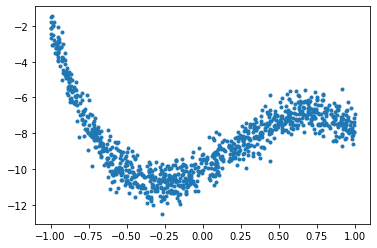

In [10]:
sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set

x_val = np.random.uniform(low = -1, high = 1, size = sample_num)
np.random.shuffle(x_val)
w1 = np.random.randint(low = -10, high = 10)
w2 = np.random.randint(low = -10, high = 10)
w3 = np.random.randint(low = -10, high = 10)
w4 = np.random.randint(low = -10, high = 10)

y = w1*x_val**3 + w2*x_val**2 + w3*x_val + w4
y_val = y + (0.6 * np.random.randn(x_val.shape[0])) # add noise
plt.plot(x_val, y_val, '.')

In [11]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

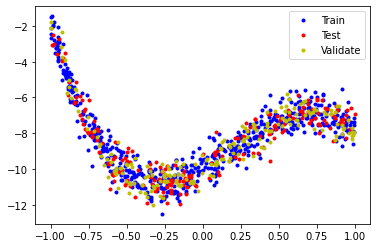

In [12]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [13]:
# initialize weights and bias
def initialize_parameters(layer_dims):

    params = {}  # initialize a dictionary for storing parameters
    L = len(layer_dims)  # number of layers in the network

    for l in range(1, L):
        params['w'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01 # initialize weights
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))   # initialize bias

        assert(params['w'+str(l)].shape == (layer_dims[l], layer_dims[l-1])) # check the shape of weights
        assert(params['b'+str(l)].shape == (layer_dims[l], 1)) # check the shape of bias

    return params

def ReLU(Z):
    return np.maximum(Z, 0)

# Forward propagation

def forward_pg (A, W, b):
    Z = np.dot(W, A) + b # compute the linear combination

    assert(Z.shape == (W.shape[0], A.shape[1])) # check the shape of linear combination
    cache = (A, W, b) # store the linear combination in cache
    
    return Z, cache



In [ ]:

def ReLU(Z):
    return np.maximum(Z, 0)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2